# Project Overview

The American prison system was never capable of handling the task they are believed to be handling because they were designed by the same people who wrote “All people are considered equal” without considering anyone of color as people.

# Problem Description
The prison system is designed to increase the gap racial classes by oppressing those of color.

# Subject Matter Expertise
 
1. Statistics and Probability
2. Data Visualization
3. Data Analysis


# Assumptions
Anyone who filed under Hispanic descent will not be counted as white.

There isn't a significant enough change in population from 2014 and 2016 to consider the data as 'old'.

# Steps to Explore the Topic and Problem

1. Download data consisting of general and in prison populations
2. Webscrape for the more specific state populations
3. Compare the ratios of those in and out based on race
4. Analyze the change in numbers over years
5. Compare the amount of convictions between the races
6. Determine the likelyhood of being arrested out of selected amount of people [100]
7. Conclude why it looks as though groups are being targeted

# Data Sources:

1. Prison Population over the Years by Race 'https://www.bjs.gov/index.cfm?ty=pbse&sid=40'

2. VA Population by Race 'https://censusreporter.org/data/table/?table=B03002&primary_geo_id=04000US51&geo_ids=04000US51,01000US#'

3. VA General Population 'https://www.virginia-demographics.com/counties_by_population'

4. Virginia Demographics 'https://www.virginia-demographics.com/counties_by_population'

# Data Exploration
There hasn't been a significant enough change in numbers when comparing the graphs. This would suggest that whatever measures are or aren't being implemented have provided no results in progressing or transforming the corrupted prison system.

# Data Cleaning

Downloading csv files or converting spreadsheets to csvs brought up formatting issues that I cleaned up by using the .drop() method to remove columns that weren't needed. To make the dataframe more visually clean, I also used the .rename() method to give the columns simpler names.

Most of my databases were just populations and percentages so outliers were not an issue.

# Describe the Data Using Descriptive Stats

The central tendency of the general US prison population has slightly decrease, but not significantly enough to suggest there are active measures being put in place. There's isn't much difference in the standard deviaton, either.

The average, or mean, of people of color in prison stays consistently larger in proportion compared to white people over the year.

# Data Visualization

I used a pie chart to visualize the percentage/ratio of the different races both in and out of prison.

I used a line graph to visualize the ongoing lack of change in convictions over the years.

I used a stacked bar chart to show what the general population of 100 would potentially look like based on overall percentages.

I used another pie chart to visualize my chances of being convicted in Virginia as a black man.

# Topic Conclusions

I wanted to show one of the many issues within the prison system. I downloaded a number of datasets that describe the populations of people living in and out of prison. I found out that a large portion of prisons are made up of people of color, but the general population of America is significantly made up of white people. With the help of research, I have learned that prisons were initally designed for slaves and later transformed into a method of keeping the economic classes apart. This was an easier was of saying 'a method of dividing the races' as money was the main factor in what distinguished all the groups. With that in mind and the data I have found, there a clear parallel in today's prison system still enforcing those past beliefs where you're more likely to be arrested and convicted if you are someone of color. As a black man of color, I have no choice but to overcompensate to ensure my 'safety'.

# Future Exploration
With more knowledge on the topic, I could present the issue to someone who makes the decisions in order to make some difference. My statements and concerns would be backed up with more proof and data.

# Below includes all of my code

In [1]:
# importing libraries
import pandas as pd
import numpy as np 
import requests
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
 
from urllib.request import urlopen
from bs4 import BeautifulSoup # pip install beautifulsoup4
from tabulate import tabulate # pip install tabulate
# pip install lmxl

In [2]:
# importing files

# US prison population over the years by race
race = pd.read_csv("p18t03.csv",encoding='cp1252')
race_copy = race[10:20]
race_copy = race_copy.rename(columns={'Bureau of Justice Statistics': 'Year', 'Unnamed: 2':'Total', 'Unnamed: 4':'Federal','Unnamed: 6': 'State','Unnamed: 12':'White', 'Unnamed: 14':'Black','Unnamed: 16':'Hispanic'})
race_copy = race_copy.drop(['Unnamed: 1','Unnamed: 3','Unnamed: 5','Unnamed: 7','Unnamed: 8','Unnamed: 10','Unnamed: 9','Unnamed: 11','Unnamed: 13','Unnamed: 15','Unnamed: 17'], axis=1)

# VA population over the years by counties
#population = pd.read_csv("Virginia Population by County.csv",encoding='cp1252')
#population_copy = population[3:230]
#population_copy = population_copy.rename(columns={'table with row headers in column A and column headers in rows 3 through 4 (leading dots indicate sub-parts)':'County','Unnamed: 1':'Census','Unnamed: 2':'Estimates Base','Unnamed: 3':'2010','Unnamed: 4':'2011','Unnamed: 5':'2012','Unnamed: 6':'2013','Unnamed: 7':'2014','Unnamed: 8':'2015', 'Unnamed: 9':'2016','Unnamed: 10': '2017','Unnamed: 11':'2018', 'Unnamed: 12':'2019'})

# US v VA diversity comparison in 2016
diversity = pd.read_csv("VA Population by Race.csv", encoding='cp1252')
first_slice = diversity[28:35]
second_slice = diversity[37:38]
div = pd.concat([first_slice, second_slice])
div = div.rename(columns={'B03002':'Race','Hispanic or Latino Origin by Race':'USA','Unnamed: 3':'VA'})
diversity_copy = div.drop(['Unnamed: 2', 'Unnamed: 4'], axis=1)

In [3]:
# This will be where I web scrape once possible
# JupyterHub is having a connection error when I try to install beautifulsoup4 and lmxl

url = "https://www.virginia-demographics.com/counties_by_population"
html = urlopen(url)
soup = BeautifulSoup(html.read(),'html.parser')
table = soup.find_all('table') 
tables = pd.read_html(str(table))

tables[0]

,Rank,County,Population
0,1,Fairfax County,1147532
1,2,Prince William County,470335
2,3,Virginia Beach city/county,449974
3,4,Loudoun County,413538
4,5,Chesterfield County,352802
...,...,...,...
128,129,Craig County,5131
129,130,Bath County,4147
130,131,Norton city/county,3981
131,132,Highland County,2190


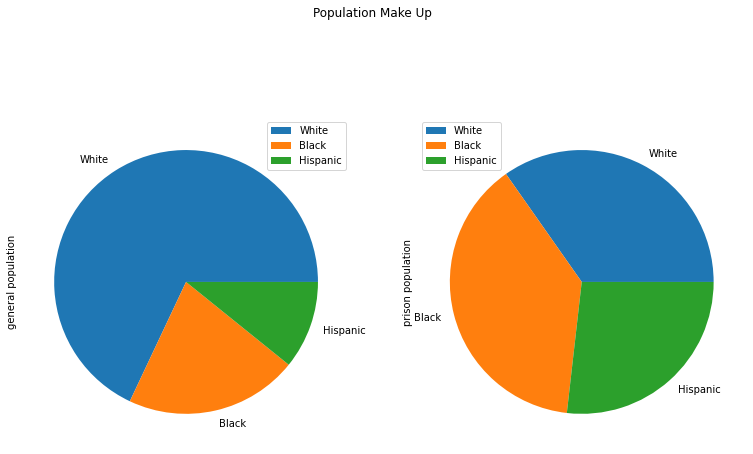

In [4]:
# data visualization : pie chart
white = race_copy['White']
black = race_copy['Black']
hispanic = race_copy['Hispanic']
whiteprison = white[18] # year 2016
blackprison = black[18]
hispanicprison = hispanic[18]
whiteprison = int(whiteprison.replace(',', ''))
blackprison = int(blackprison.replace(',', ''))
hispanicprison = int(hispanicprison.replace(',', ''))

VA = diversity_copy['VA']
w = float(VA[28].replace('%', ''))
b = float(VA[29].replace('%', ''))
h = float(VA[37].replace('%', ''))

piechart = pd.DataFrame({'general population': [w, b, h],'prison population': [whiteprison, blackprison, hispanicprison]},index=['White', 'Black', 'Hispanic'])
plot = piechart.plot.pie(subplots=True, figsize=(13, 8), title='Population Make Up')

<AxesSubplot:xlabel='Year', ylabel='Population in millions'>

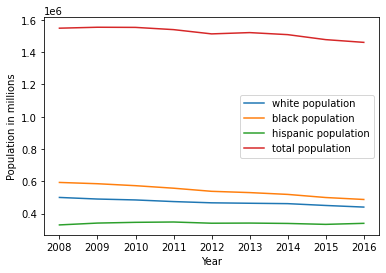

In [5]:
Total = race_copy['Total']
Black = race_copy['Black']
White = race_copy['White']
Hispanic = race_copy['Hispanic']

Total = Total.replace(',','', regex=True)
Black = Black.replace(',','', regex=True)
White = White.replace(',','', regex=True)
Hispanic = Hispanic.replace(',','', regex=True)

Total = pd.to_numeric(Total)
Black = pd.to_numeric(Black)
White = pd.to_numeric(White)
Hispanic = pd.to_numeric(Hispanic)

linegraph = pd.DataFrame({'white population': [White[10], White[11], White[12], White[13], White[14], White[15], White[16], White[17], White[18]],
                          'black population': [Black[10], Black[11], Black[12], Black[13], Black[14], Black[15], Black[16], Black[17], Black[18]],
                          'hispanic population': [Hispanic[10], Hispanic[11], Hispanic[12], Hispanic[13], Hispanic[14], Hispanic[15], Hispanic[16], Hispanic[17], Hispanic[18]],
                          'total population': [Total[10], Total[11], Total[12], Total[13], Total[14], Total[15], Total[16], Total[17], Total[18]]},
                          index=[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])
lgraph = linegraph.plot.line()

lgraph.set_xlabel("Year")
lgraph.set_ylabel("Population in millions")
lgraph

<AxesSubplot:title={'center':'In a community of 100 people'}, xlabel='Race', ylabel='Amount of persons'>

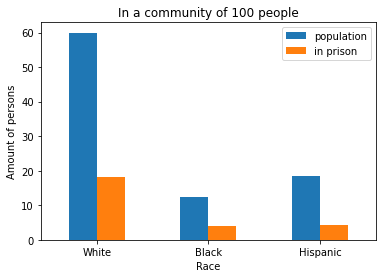

In [6]:
# likelyhood of being affected as a black man versus a white
# use VA % and VA county populations
# estimated population 2016: 8,411,808

# makeup out of 100 citizen based on percentages
USA = diversity_copy['USA']
wpercent = float(USA[28].replace('%', ''))
bpercent = float(USA[29].replace('%', ''))
hpercent = float(USA[37].replace('%', ''))

citizens = [wpercent, bpercent, hpercent]

# pulling out number of citizens in 2016 
w = White[18]
b = Black[18]
h = Hispanic[18]
t = Total[18]

#
whundred = w/t * wpercent
bhundred = b/t * bpercent
hhundred = h/t * hpercent
inprison = [whundred, bhundred, hhundred]
citizens = [wpercent, bpercent, hpercent]

index = ['White', 'Black', 'Hispanic']
df = pd.DataFrame({'population': citizens,
                   'in prison': inprison}, index=index)
bgraph = df.plot.bar(rot=0, title='In a community of 100 people')
bgraph.set_xlabel("Race")
bgraph.set_ylabel("Amount of persons")
bgraph

793089.8377500001

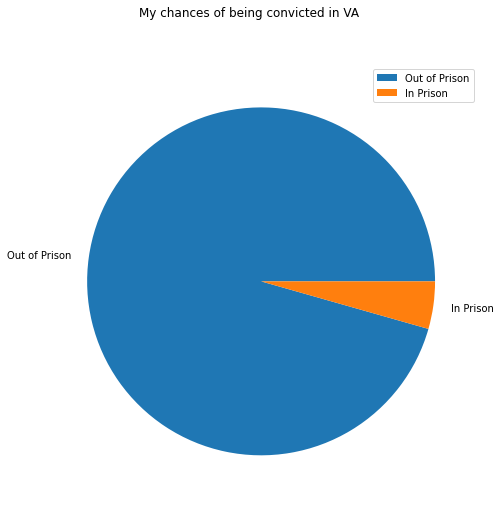

In [24]:
VAstats = tables[0]
VApops = VAstats['Population']
VApops = VApops[:132]
VApops = pd.to_numeric(VApops)
VAtotal = VApops.sum(axis=0)

VA = diversity_copy['VA']
b = float(VA[29].replace('%', ''))
VAblack = b/100 * VAtotal

# VA prison population 69000
# 53% black
# https://www.vera.org/downloads/pdfdownloads/state-incarceration-trends-virginia.pdf
VAblackprison = .53 * 69000
VAblack = VAblack - VAblackprison
# just men
VAblack = VAblack/2

pc = pd.DataFrame({'': [VAblack, VAblackprison]},index=['Out of Prison', 'In Prison'])
likely = pc.plot.pie(subplots=True, figsize=(13, 8), title='My chances of being convicted in VA')